# Assignment: Traffic Flow

---

Consider the flow of traffic on a one-lane highway.
How can we describe the general behavior of this system?

We can define the speed of traffic, $V$, in kilometers per hour.
We can also define a traffic density, the number of cars per unit length of highway, $\rho$, in cars per kilometer.
Finally, we can define a traffic flux, or the flow rate of cars, $F$,in cars per hour.

Now make a few assumptions about how traffic moves.

If $\rho$ approaches $0$, i.e. there are very few cars on the road, then cars will drive as fast as they can at some $V_\text{max}$.

Conversely, if cars are bumper to bumper along the road, then $\rho$ approaches a $\rho_\text{max}$ and $V$ approaches $0$.

One possible equation to describe this behavior is

$$
\begin{equation}
    V = V_\text{max} \left( 1 - \frac{\rho}{\rho_\text{max}} \right)
\end{equation}
$$

If we describe the traffic flux, $F$ as $F = \rho V$, then

$$
\begin{equation}
    F = F \left( \rho \right) = V \left( \rho \right) \rho = V_\text{max} \rho \left( 1 - \frac{\rho}{\rho_{max}} \right)
\end{equation}
$$

Unsteady traffic flow can be modeled as the non-linear convection of car density, so we apply the non-linear convection equation with $V$, the wave speed, equal to $\frac{\partial F}{\partial \rho}$:

$$
\begin{equation}
    \frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial \rho} \frac{\partial \rho}{\partial x} = 0
\end{equation}
$$

Applying the chain rule of calculus, this becomes

$$
\begin{equation}
    \frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0
\end{equation}
$$

where $F$ is defined as above.
The PDE above is written in conservation form.
(See section at the end of Notebook for more details about the conservation form.)

You will integrate the traffic flow equation (in conservation form) using the modified Euler's method (also called midpoint method or Runge-Kutta second-order method).
You will discretize the first-order spatial derivative with a backward-difference quotient:

$$
\begin{equation}
    \left. \frac{\partial F}{\partial x} \right|_i = \frac{F_i - F_{i-1}}{\Delta x} = \frac{F(\rho_i) - F(\rho_{i-1})}{\Delta x}
\end{equation}
$$

Examine a stretch of road using the following conditions:

* $V_\text{max} = 90 \; \text{km/h}$
* $L = 25 \; \text{km}$
* $\rho_\text{max} = 100 \; \text{cars/km}$
* $nx = 101$ (number of points to discretize the road of length $L$)
* $\Delta t = 0.001 \; \text{hours}$

## Implement your solution (40 points)

---

Implement your solution in this section.
You can use as many code cells as you want.

In [71]:
# YOUR CODE HERE
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline

In [72]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16
sympy.init_printing()

In [73]:
# Set parameters.
nx = 101
L = 25.0
dx = L / (nx - 1)
dt = 0.001
Vmax = 90.0
𝜌max = 100

In [74]:
# Get the grid point coordinates.
x = numpy.linspace(0.0, L, num=nx)

## Assessment (60 points)

---

Answer questions in this section.

Do not try to delete or modify empty code cells that are already present.
For each question, provide your answer in the cell **just above** the empty cell.
(This empty cell contains hidden tests to assert the correctness of your answer and cannot be deleted.)
Pay attention to the name of the variables we ask you to create to store computed values; if the name of the variable is misspelled, the test will fail.

In [75]:
#######################################
# IMPORTANT
#
# Import mooc38 if you use Python 3.8
# It will not work for other versions
#
#######################################

# Import module to check your answers.
import mooc38 as mooc

### Part A

Use the following initial condition

$$
\begin{equation}
    \rho_0 = \rho \left(x, t = 0 \right) =
    \begin{cases}
        50 \quad \text{if} \; 2 \leq x \leq 4.2 \\
        10 \quad \text{otherwise}
    \end{cases}
    ,\quad \forall x \in \left[ 0, L \right]
\end{equation}
$$

and the following boundary condition

$$
\begin{equation}
    \rho \left( x=0, t \right) = \rho \left( x=L, t \right) = 10, \quad \forall t
\end{equation}
$$

to answer questions Q1, Q2, Q3, and Q4.

In [76]:
# YOUR CODE HERE
# Set the initial conditions.𝜌
u0 = numpy.ones(nx)
for i in range(len(u0)):
    if u0[i] == 1:
        u0[i] = 10    
mask = numpy.where(numpy.logical_and(x >= 2.0, x <= 4.2))
u0[mask] = 50.0

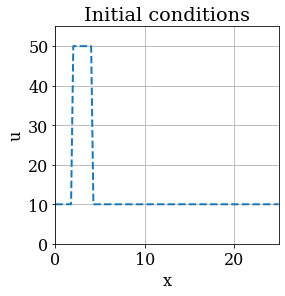

In [77]:
# Plot the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.title('Initial conditions')
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, color='C0', linestyle='--', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 55);

In [78]:
# get the non-linear solution
nt = int(1/15/dt)
u = u0.copy()
for n in range(1, nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - dt/dx * (un[i]*Vmax*(1-un[i]/𝜌max) - un[i-1]*Vmax*(1-un[i-1]/𝜌max))

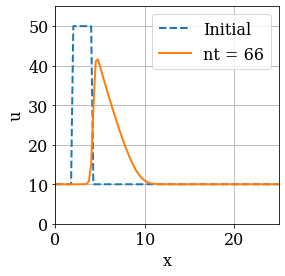

In [79]:
# Plot the solution after nt time steps
    # along with the initial conditions.
pyplot.figure(figsize=(4.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, label='Initial',
                color='C0', linestyle='--', linewidth=2)
pyplot.plot(x, u, label='nt = {}'.format(nt),
                color='C1', linestyle='-', linewidth=2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 55);

* **Q1 (5 points):** What's the minimum initial velocity in meters per second?

Store your result in the variable `v0_min`; you can check your answer by calling the function `mooc.check('hw2_answer1', v0_min)`.

In [80]:
# YOUR CODE HERE
a = max(u0)
v0_min = Vmax * (1 - a / 𝜌max) * 1000 / 3600
print(v0_min)
mooc.check('hw2_answer1', v0_min)

12.5
[hw2_answer1] Good job!


* **Q2 (10 points):** What's the average velocity, in meters per second, along the road after $4$ minutes?

Store your result in the variable `v4_mean`; you can check your answer with the function `mooc.check('hw2_answer2', v4_mean)`.

In [81]:
# YOUR CODE HERE
b = 0
for i in u:
    b = b + i   
𝜌4 = b / len(u)
v4_mean = Vmax*(1-𝜌4/𝜌max)*1000/3600
print(v4_mean)
mooc.check('hw2_answer2', v4_mean)

21.60891089108911
[hw2_answer2] Good job!


* **Q3 (10 points):** What's the minimum velocity, in meters per second, after $8$ minutes?

Store your result in the variable `v8_min`; you can check your answer with the function `mooc.check('hw2_answer3', v8_min)`.

In [82]:
# YOUR CODE HERE
nx = 101
L = 25.0
dx = L / (nx - 1)
dt = 0.001
Vmax = 90.0
𝜌max = 100
nt = int(8/60/dt)

x = numpy.linspace(0.0, L, num=nx)

u0 = numpy.ones(nx)
for i in range(len(u0)):
    if u0[i] == 1:
        u0[i] = 10    
mask = numpy.where(numpy.logical_and(x >= 2.0, x <= 4.2))
u0[mask] = 50.0
u0[0] = 10
u0[-1] = 10

u = u0.copy()
for n in range(1, nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - dt/dx * (un[i]*Vmax*(1-un[i]/𝜌max) - un[i-1]*Vmax*(1-un[i-1]/𝜌max))


c = max(u)
print(c)
v8_min = Vmax * (1 - c / 𝜌max) * 1000 / 3600
print(v8_min)
mooc.check('hw2_answer3', v8_min)

31.807381516040245
17.04815462098994
[hw2_answer3] Try again!


* **Q4 (5 points):** What's the maximum car density, in cars per kilometer, along the road after 8 minutes?

Store you result in the variable `rho8_max`; you can check your answer with `mooc.check('hw2_answer4', rho8_max)`.

In [13]:
# YOUR CODE HERE


### Part B

Now, set $V_\text{max} = 130 \; \text{km/hr}$ and redo the simulations using the following initial condition for the traffic density

$$
\begin{equation}
    \rho_0 = \rho \left(x, t = 0 \right) =
    \begin{cases}
        50 \quad \text{if} \; 2 \leq x \leq 4.2 \\
        20 \quad \text{otherwise}
    \end{cases}
    ,\quad \forall x \in \left[ 0, L \right]
\end{equation}
$$

and the following boundary condition

$$
\begin{equation}
    \rho \left( x=0, t \right) = \rho \left( x=L, t \right) = 20, \quad \forall t
\end{equation}
$$

Redo the simulations to answer questions Q5, Q6, Q7, and Q8.

In [14]:
# YOUR CODE HERE
nx = 101
L = 25.0
dx = L / (nx - 1)
dt = 0.001
Vmax = 90.0
𝜌max = 100

x = numpy.linspace(0.0, L, num=nx)

NotImplementedError: 

* **Q5 (5 points):** What's the minimum initial velocity in meters per second?

Store your result in the variable `v0_min2`; you can check your answer by calling the function `mooc.check('hw2_answer5', v0_min2)`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

* **Q6 (10 points):** What's the average velocity, in meters per second, along the road after $4$ minutes?

Store your result in the variable `v4_mean2`; you can check your answer with the function `mooc.check('hw2_answer6', v4_mean2)`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

* **Q7 (10 points):** What's the minimum velocity, in meters per second, after $8$ minutes?

Store your result in the variable `v8_min2`; you can check your answer with the function `mooc.check('hw2_answer7', v8_min2)`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

* **Q8 (5 points):** What's the average car density, in cars per kilometer, along the road after 8 minutes?

Store your result in the variable `rho8_mean2`; you can check your answer with the function `mooc.check('hw2_answer8', rho8_mean2)`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Conservation and non-conservation forms

---

The traffic flow is modeled by the following equation

$$
\begin{equation}
    \frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0
\end{equation}
$$

where $\rho$ is the density and $F$ is the flux of density given by

$$
\begin{equation*}
    F = F \left( \rho \right) = \rho V \left( \rho \right) = \rho V_\text{max} \left( 1 - \frac{\rho}{\rho_\text{max}} \right)
\end{equation*}
$$

The equation above is called the **conservation form** of the traffic-flow equation.

Alternatively, we could also write another equation by deriving the flux with respect to $x$:

$$
\begin{eqnarray*}
    \frac{\partial \rho}{\partial t} &=& -\frac{\partial F}{\partial x} \\
    &=& -\frac{\partial F}{\partial \rho} \frac{\partial \rho}{\partial x} \\
    &=& - V_\text{max} \left( 1 - 2 \frac{\rho}{\rho_\text{max}} \right) \frac{\partial \rho}{\partial x}
\end{eqnarray*}
$$

i.e.,

$$
\begin{equation}
    \frac{\partial \rho}{\partial t} + V_\text{max} \left( 1 - 2 \frac{\rho}{\rho_\text{max}} \right) \frac{\partial \rho}{\partial x} = 0
\end{equation}
$$

The equation above is call the **non-conservation form** of the traffic-flow equation.

Although the two equations are mathematically identical, their respective discrete version is different and will not lead to the same numerical solution.

Suppose, we want to advance the solution in time using a first-order Euler's method while computing the space derivative using a backward-difference technique.

The discrete version of the equation in conservation form is

$$
\begin{equation}
    \frac{\rho_i^{n + 1} - \rho_i^n}{\Delta t} + \frac{F_i^n - F_{i-1}^n}{\Delta x} = 0
\end{equation}
$$

which leads to

$$
\begin{equation}
    \frac{\rho_i^{n + 1} - \rho_i^n}{\Delta t} + \frac{\rho_i^n V_\text{max} \left( 1 - \frac{\rho_i^n}{\rho_\text{max}} \right) - \rho_{i - 1}^n V_\text{max} \left( 1 - \frac{\rho_{i - 1}^n}{\rho_\text{max}} \right)}{\Delta x} = 0
\end{equation}
$$

The discrete version of the equation in non-conservation form is

$$
\begin{equation}
    \frac{\rho_i^{n + 1} - \rho_i^n}{\Delta t} + V_\text{max} \left( 1 - 2 \frac{\rho_i^n}{\rho_\text{max}} \right) \frac{\rho_i^n - \rho_{i - 1}^n}{\Delta x} = 0
\end{equation}
$$

You can see that the two discrete equations are different, and thus will not lead to the same numerical solution.

For the second assignment of this class, you should discretize the traffic-flow equation in its conservation form.